## Network Monitoring Project - Group 17

Team Members - 
* Palash Choudhary
* Saksham Arora
* Shreyas Verma

**Given :**

- We are given a binary detection matrix $F \in \{{0,1}\}^{|{\mathcal{E}| \times |\mathcal{V}}|}$ that represents the sensing capabilities of the pressure sensors. The dimensions of this matrix are 1123 x 811, where every element $f_{e,v} = 1$ if a sensor placed at location $v \in \mathcal{V}$ can detect a burst of pipe $e \in \mathcal{E}$.



# (A) Integer Program Formulation

**Decision Variable :**
$$
\begin{aligned}
& x_v= \begin{cases}1 & \text {: sensor is placed at node $v$ } \forall \ v \in \mathcal{V} \\
0 & \text {: otherwise}\end{cases} \end{aligned} \\
$$



**Objective Function :** 

 Minimize the number of sensors so that if any pipe bursts, then at least one sensor will detect it.

$$
min \quad \sum_{v=1}^{811} \ x_v \\
$$


**Constraints:**

* Each pipe should be detected by at least one sensor
$$ 
 \quad \sum_{v=1}^{811} \ f_{e,v} x_v >= 1  \quad \forall \ e \in \mathcal{E}\\\\
$$

# (B) Solving the above Formulation

In [1]:
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading in detection matrix file

In [2]:
det_mat = pd.read_csv("Detection_Matrix.csv",header=None)
det_mat

,0,1,2,3,4,5,6,7,8,9,...,801,802,803,804,805,806,807,808,809,810
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
det_mat = np.array(det_mat)

In [5]:
det_mat.shape

(1123, 811)

### Min. number of sensors s.t. any pipe burst detected by at least 1 sensor

In [6]:
num_pipes = 1123 #e
num_nodes = 811 #v

In [7]:
node_capability = {}
for j in range(num_nodes):
    node_capability[j] = det_mat[:,j]

In [8]:
node_capability[0].shape

(1123,)

In [9]:
pipe_detectability = {}
for i in range(num_pipes):
    pipe_detectability[i] = det_mat[i]

In [10]:
pipe_detectability[0].shape

(811,)

### Decision variables

In [11]:
prob = LpProblem("network_monitoring_part_a", LpMinimize)

In [12]:
x_var = LpVariable.dicts("x", node_capability, lowBound = 0, upBound=1,cat='Integer')

### Objective Function

In [13]:
prob += lpSum([x_var[i] for i in range(num_nodes)])

### Constraint

In [14]:
for pipe in range(num_pipes):
    prob += lpSum([x_var[node]*pipe_detectability[pipe][node] for node in range(num_nodes)]) >= 1


### Solve

In [ ]:
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))

In [16]:
prob.objective.value()

19.0

In [24]:
print("Sensors placed at following node locations")
for k,v in x_var.items():
    if v.value()==1:
        print(f"Node {k}")
print("Note: Node indices printed are 0-indexed")

Sensors placed at following node locations
Node 16
Node 78
Node 104
Node 206
Node 233
Node 277
Node 392
Node 395
Node 424
Node 426
Node 430
Node 438
Node 454
Node 482
Node 651
Node 705
Node 712
Node 748
Node 786
Note: Node indices printed are 0-indexed


## Hence, the minimum number of sensors to detenct any pipe burst = 19

# (C) Integer Program Formulation with a constraint of B sensors

*Given :*

We are given a binary detection matrix $F \in \{{0,1}\}^{|{\mathcal{E}| \times |\mathcal{V}}|}$ that represents the sensing capabilities of the pressure
sensors. The dimensions of this matrix are 1123 x 811, where every element $f_{e,v} = 1$ if a sensor placed at location $v \in \mathcal{V}$ can detect a burst of pipe $e \in \mathcal{E}$.

*Problem Formulation*

Let $Y_e$ be a discrete random variable which denotes whether pipe $e$ bursts. Thus we have, 
$$
\begin{aligned}
& p_{Y_e}(y)= \begin{cases}0.1 & \text {:$y = 1$ } \\
0.9 & \text {:$y = 0$}\end{cases} \end{aligned}
$$

Let $p_e$ be an integer denoting if pipe $e$ is detectable by any sensor. 

$$
\begin{aligned}
& p_e= \begin{cases}1 & \text {: pipe e is detected by any sensor } \\
0 & \text {: otherwise}\end{cases} \end{aligned}
$$

Let $D_e$ be another discrete random variable which denotes whether pipe burst of $e$ will be detected.
  
Thus, we know,

$$
\begin{aligned}
& p_{D_e|Y_e=1}(d)= \begin{cases}p_e & \text {:$d = 1$ } \\
1 - p_e & \text {:$d = 0$}\end{cases} \end{aligned}
$$
$$
\begin{aligned}
& p_{D_e|Y_e=0}(d)= \begin{cases}0 & \text {:$d = 1$ } \\
1 & \text {:$d = 0$}\end{cases} \end{aligned}
$$

From total probability theorem we can write,
$$
\begin{aligned}
& p_{D_e}(d=1) = p_{D_e|Y_e=0}(d=1) p_{Y_e}(y=0) + p_{D_e|Y_e=1}(d=1) p_{Y_e}(y=1)   \\
& p_{D_e}(d=0) = p_{D_e|Y_e=0}(d=0) p_{Y_e}(y=0) + p_{D_e|Y_e=1}(d=0) p_{Y_e}(y=1)   \\
\end{aligned}
$$

Solving, we get,
$$
\begin{aligned}
& p_{D_e}(d)= \begin{cases}0.1p_e & \text {$d=1$ } \\
1- 0.1p_e & \text {$d=0$}\end{cases} \end{aligned}
$$

Now computing expectation of random variable $D_e$, we get
$$
\begin{aligned}
& E(D_e) = \sum_{d} \ d*p_{D_e}(d)\
E(D_e) & = 0.1p_e
\end{aligned}
$$
Now, our problem is to maximize expected number of pipe bursts detected, given b sensors
The expected number of pipe bursts is given by:
$$
\begin{aligned}
max \quad E(\sum_{e=1}^{1123} \ D_e)\\
max \quad \sum_{e=1}^{1123} \ E(D_e) & \text{(since $D_e$'s and $Y_e$'s are independent random variables)}\\
max \quad \sum_{e=1}^{1123} \ 0.1p_e
\end{aligned}
$$



**Decision Variable :**
$$
\begin{aligned}
& x_v = \begin{cases}1 & \text {: sensor is placed at node $\ v$ } \forall \ v \in \mathcal{V} \\
0 & \text {: otherwise}\end{cases} \\
& p_e = \begin{cases}1 & \text {: pipe $\ e$ is detectable by any sensor } \forall \ e \in \mathcal{E} \\
0 & \text {: otherwise}\end{cases} \end{aligned}
$$



**Objective Function :**
Maximize the expected number of pipe bursts that are detected
$$
max \quad \sum_{e=1}^{1123} \ 0.1p_e\\
$$

**Constraints:**

* Number of Sensors are limited to $b$
$$
\quad 
 \sum_{v=1}^{811} x_v=b \\
$$
* If a pipe is detected, then it should be detectable by at least one of the sensors
$$
p_e \leqslant \sum_{v=1}^{811} f_{e,v} x_v \quad \forall \ e \in \mathcal{E} \\
$$

# (D) Solving the above formulation

### Maximize expected number of pipe bursts that are detected

In [25]:
prob = LpProblem("network_monitoring_part_c", LpMaximize)

In [26]:
PROBABILITY_PIPE_BURST = 0.1
b_NUM_PRESSURE_SENSORS = 20

### Decision Variables

In [27]:
x_var = LpVariable.dicts("x", node_capability, lowBound = 0, upBound=1,cat='Integer')

In [28]:
is_pipe_detectable_var = LpVariable.dicts("p", pipe_detectability, lowBound = 0, upBound=1,cat='Integer')

### Objective Function

In [29]:
prob += lpSum([PROBABILITY_PIPE_BURST*is_pipe_detectable_var[i] for i in range(num_pipes)])

### Constraint

### 1. Number of pressure sensors

In [30]:
prob += lpSum([x_var[node] for node in range(num_nodes)]) == b_NUM_PRESSURE_SENSORS


### 2. Pipe is not detectable if no selected sensors are present on it

In [31]:
for pipe in range(num_pipes):
    prob += is_pipe_detectable_var[pipe]<= lpSum([x_var[node]*pipe_detectability[pipe][node] for node in range(num_nodes)])


In [ ]:
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))

In [33]:
prob.objective.value()

112.2999999999979

#### Helper function to loop for different values of $\ b$

In [35]:
def solve_for_b(b_NUM_PRESSURE_SENSORS,PROBABILITY_PIPE_BURST= 0.1):
    prob = LpProblem(f"network_monitoring_part_c_b={b_NUM_PRESSURE_SENSORS}", LpMaximize)
    x_var = LpVariable.dicts("x", node_capability, lowBound = 0, upBound=1,cat='Integer')
    is_pipe_detectable_var = LpVariable.dicts("p", pipe_detectability, lowBound = 0, upBound=1,cat='Integer')
    ## Objective Function
    prob += lpSum([PROBABILITY_PIPE_BURST*is_pipe_detectable_var[i] for i in range(num_pipes)])
    prob
    ## Constraint
    ## Number of pressure sensors
    prob += lpSum([x_var[node] for node in range(num_nodes)]) == b_NUM_PRESSURE_SENSORS

    ## Pipe should be detectable if a sensor is present on it
    for pipe in range(num_pipes):
        prob += is_pipe_detectable_var[pipe]<= lpSum([x_var[node]*pipe_detectability[pipe][node] for node in range(num_nodes)])

    path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))
    return prob.objective.value()


In [36]:
b_values = np.arange(0,21)
b_values 


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
optimal_values = np.array([solve_for_b(b) for b in b_values])

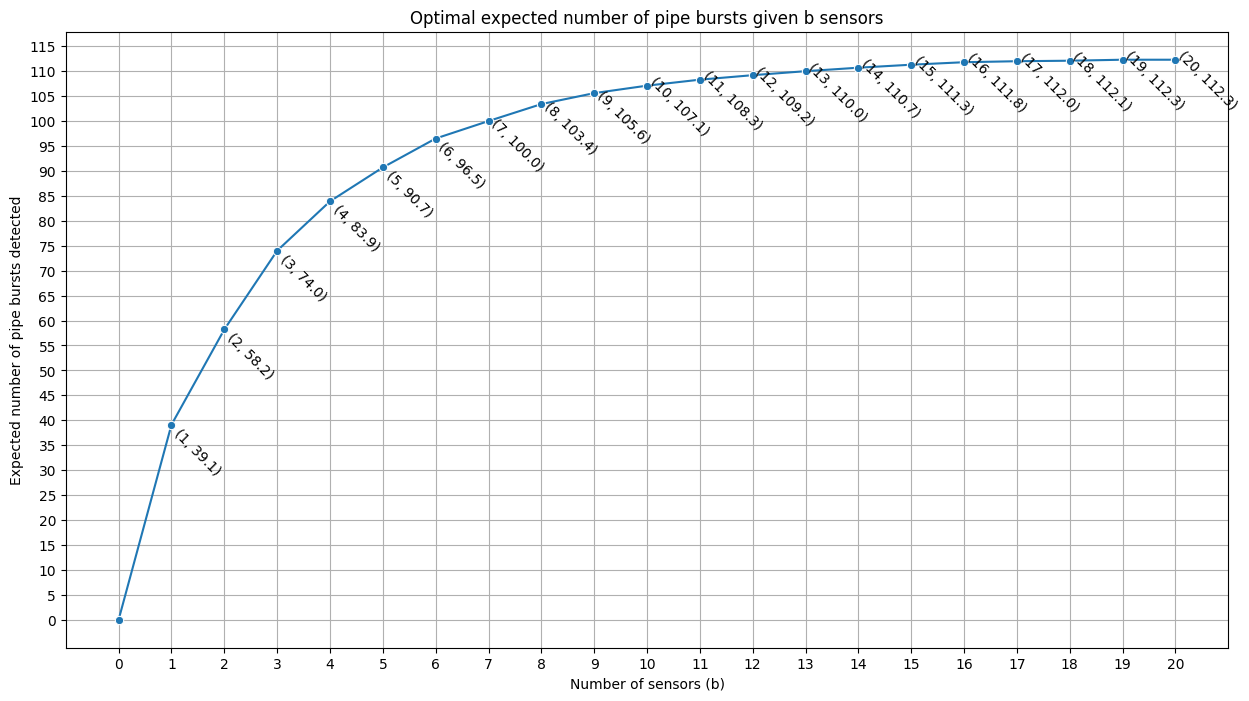

In [71]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(15)
fig.set_figheight(8)
ax.set_xticks([i for i in range(21)])
ax.set_yticks(np.arange(0,130,5))
sns.lineplot(x=b_values,y=optimal_values,marker='o',ax=ax,legend=True)
ax.set_title("Optimal expected number of pipe bursts given b sensors")
ax.set_xlabel("Number of sensors (b)")
ax.set_ylabel("Expected number of pipe bursts detected")
for b, o in zip(b_values,optimal_values):
    ax.annotate(f'({b}, {round(o,1)})', xy=(b, o-10),rotation=-45)
ax.grid()


In [60]:
optimal_values

array([  0. ,  39.1,  58.2,  74. ,  83.9,  90.7,  96.5, 100. , 103.4,
       105.6, 107.1, 108.3, 109.2, 110. , 110.7, 111.3, 111.8, 112. ,
       112.1, 112.3, 112.3])

The maximum expected pip bursts are detected when placing 19 sensors. The optimal value is 112.29

# (E) Iterative and Myopic Selection 

In [61]:
def get_expected_max_node(det_mat,PROBABILITY_PIPE_BURST=0.1):
    curr_best_node = np.argmax(det_mat.sum(axis=0))
    curr_best_expected_pipe_bursts = max(det_mat.sum(axis=0))*PROBABILITY_PIPE_BURST
    new_det_mat = det_mat.copy()
    
    new_det_mat[:,curr_best_node]=0 # remove node
    pipes_detected = np.argwhere(node_capability[curr_best_node]==1)
    pipes_detected = pipes_detected.reshape(pipes_detected.shape[0])
    new_det_mat[pipes_detected,:]=0 # remove detected pipes

    return curr_best_node,curr_best_expected_pipe_bursts,new_det_mat

In [62]:
def solve_for_b_myopic(b_NUM_PRESSURE_SENSORS,PROBABILITY_PIPE_BURST=0.1):
    det_mat_copy = det_mat.copy()
    total_expected_pipe_bursts = 0
    for i in range(b_NUM_PRESSURE_SENSORS):
        curr_best_node, curr_best_expected_pipe_bursts, det_mat_copy = get_expected_max_node(det_mat_copy,PROBABILITY_PIPE_BURST)
        total_expected_pipe_bursts +=curr_best_expected_pipe_bursts
    return total_expected_pipe_bursts


In [64]:
b_values = np.arange(0,21)
b_values 


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [65]:
optimal_myopic_values = np.array([solve_for_b_myopic(b) for b in b_values])

In [66]:
optimal_myopic_values

array([  0. ,  39.1,  56.2,  72.9,  80.5,  86.4,  91.8,  96. ,  99.4,
       101.9, 103.8, 105.5, 106.8, 108. , 108.8, 109.5, 110.1, 110.6,
       111. , 111.3, 111.6])

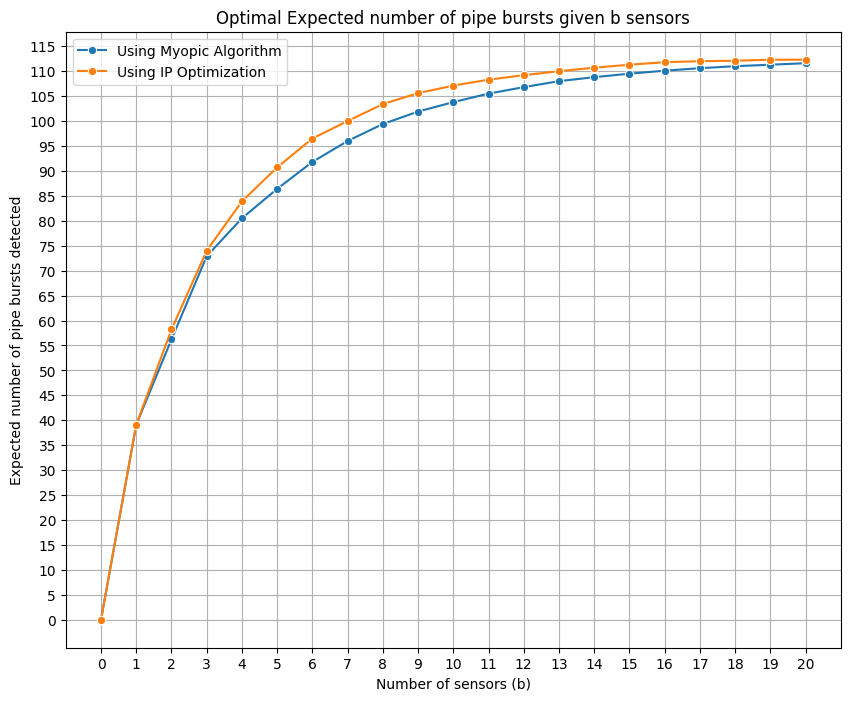

In [70]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.set_figheight(8)
ax.set_xticks([i for i in range(21)])
ax.set_yticks(np.arange(0,130,5))
sns.lineplot(x=b_values,y=optimal_myopic_values,marker='o',ax=ax,label="Using Myopic Algorithm")
sns.lineplot(x=b_values,y=optimal_values,marker='o',ax=ax,label="Using IP Optimization")

ax.set_title("Optimal Expected number of pipe bursts given b sensors")
ax.set_xlabel("Number of sensors (b)")
ax.set_ylabel("Expected number of pipe bursts detected")
ax.legend()
ax.grid()

In [39]:
optimal_myopic_values

array([  0. ,  39.1,  56.2,  72.9,  80.5,  86.4,  91.8,  96. ,  99.4,
       101.9, 103.8, 105.5, 106.8, 108. , 108.8, 109.5, 110.1, 110.6,
       111. , 111.3, 111.6])

#### Greedy approach approximates the optimized solution very well. It also has good runtime. Since it is greedy, it is not able to maximize the objective function as well as the IP formulation

# (F) Integer Program Formualtion - Minimize the highest criticality of a pipe that is not detected by any sensor

### Reading in criticality file

In [72]:
criticality = pd.read_csv("Criticality.csv",header=None)
criticality.columns = ["cr_level"]

In [73]:
criticality = criticality.to_dict()['cr_level']

**Given :**

- We are given a binary detection matrix $F \in \{{0,1}\}^{|{\mathcal{E}| \times |\mathcal{V}}|}$ that represents the sensing capabilities of the pressure sensors. The dimensions of this matrix are 1123 x 811, where every element $f_{e,v} = 1$ if a sensor placed at location $v \in \mathcal{V}$ can detect a burst of pipe $e \in \mathcal{E}$.
- Criticality level for each pipe $e \in \mathcal{E}$ is given by $ w_e \in \{0,1\}$
- The goal of the network operator is to position their b sensors as to minimize the highest criticality of a pipe that is not detected by any sensor.



**Decision Variable :**
$$
\begin{aligned}
& x_v = \begin{cases}1 & \text {: sensor is placed at node $\ v$ } \forall \ v \in \mathcal{V} \\
0 & \text {: otherwise}\end{cases} \\
& p_e = \begin{cases}1 & \text {: pipe $\ e$ is detectable by any sensor } \forall \ e \in \mathcal{E} \\
0 & \text {: otherwise}\end{cases} \end{aligned}
$$




**Objective Function :**
We want to minimize the highest crticality of the pipe which are not detected by the placed sensors

$$
\min \quad \max _{\ e \in \mathcal{E}}\left(w_e\left(1-p_e\right)\right) \\
$$
Formulating minmax problem as a linear programming formulation: 
$$
\min \quad z \\
s.t.
\ \ z \geqslant w_e\left(1-p_e\right) \quad \forall \ e \in \mathcal{E} 
$$

**Constraints:**


* Total number of sensors are limited to $\ b$
$$
 \sum_{v=1}^{811} x_v=b \\
 $$
 

* If a pipe is detected, then it should be detectable by at least one of the sensors
$$
 p_e \leqslant \sum_{v=1}^{811} f_{e,v} x_v \quad \forall \ e \in \mathcal{E} \\
$$
 

In [74]:
prob = LpProblem("network_monitoring_part_f", LpMinimize)

### Decision Variables

In [75]:
x_var = LpVariable.dicts("x", node_capability, lowBound = 0, upBound=1,cat='Integer')

In [76]:
is_pipe_detectable_var = LpVariable.dicts("p", pipe_detectability, lowBound = 0, upBound=1,cat='Integer')

In [77]:
b_NUM_PRESSURE_SENSORS = 20

In [78]:
z = LpVariable("z",0,cat="Continuous")

### Objective Function

In [79]:
prob += z

## Constraints

### Number of pressure sensors limited to $\ b$

In [80]:
prob += lpSum([x_var[node] for node in range(num_nodes)]) == b_NUM_PRESSURE_SENSORS

### Pipe is not detectable if no selected sensors are present on it

In [81]:
for pipe in range(num_pipes):
    prob += is_pipe_detectable_var[pipe]<= lpSum([x_var[node]*pipe_detectability[pipe][node] for node in range(num_nodes)])


### Minimax constraints

In [82]:
for pipe in range(num_pipes):
    prob += criticality[i]*(1-is_pipe_detectable_var[i]) <= z

### Solve

In [ ]:
path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))

In [84]:
prob.objective.value()

0.0

In [93]:
num_pipes_detected_for_b = sum([v.value() for k,v in is_pipe_detectable_var.items()])
num_pipes_detected_for_b

1.0

### Helper Function to loop for different number of sensors

In [94]:
def solve_for_b_critical(b_NUM_PRESSURE_SENSORS):
    prob = LpProblem("network_monitoring_part_f", LpMinimize)
    x_var = LpVariable.dicts("x", node_capability, lowBound = 0, upBound=1,cat='Integer')
    is_pipe_detectable_var = LpVariable.dicts("p", pipe_detectability, lowBound = 0, upBound=1,cat='Integer')
    z = LpVariable("z",0,cat="Continuous")
    ## Objective Function
    prob += z
    ## Constraints
    ### Number of pressure sensors
    prob += lpSum([x_var[node] for node in range(num_nodes)]) == b_NUM_PRESSURE_SENSORS

    ### Minimax constraints
    for pipe in range(num_pipes):
        prob += criticality[pipe]*(1-is_pipe_detectable_var[pipe]) <= z

    ### Pipe is not detectable if no selected sensors are present on it
    for pipe in range(num_pipes):
        prob += is_pipe_detectable_var[pipe] <= lpSum([x_var[node]*pipe_detectability[pipe][node] for node in range(num_nodes)])

    path_to_Gurobi = '/Library/gurobi1003/macos_universal2/bin/gurobi_cl'
    prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))
    num_pipes_detected_for_b = sum([v.value() for k,v in is_pipe_detectable_var.items()])
    return prob.objective.value(),num_pipes_detected_for_b


In [96]:
b_values = np.arange(0,21)
b_values 


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
optimal_critical_values = []
optimal_total_pipes_detected = []
for b in b_values:
    obj,npb = solve_for_b_critical(b)
    optimal_critical_values.append(obj)
    optimal_total_pipes_detected.append(npb)

# (G) Plotting Optimal Criticality Value as a function of $\ b$

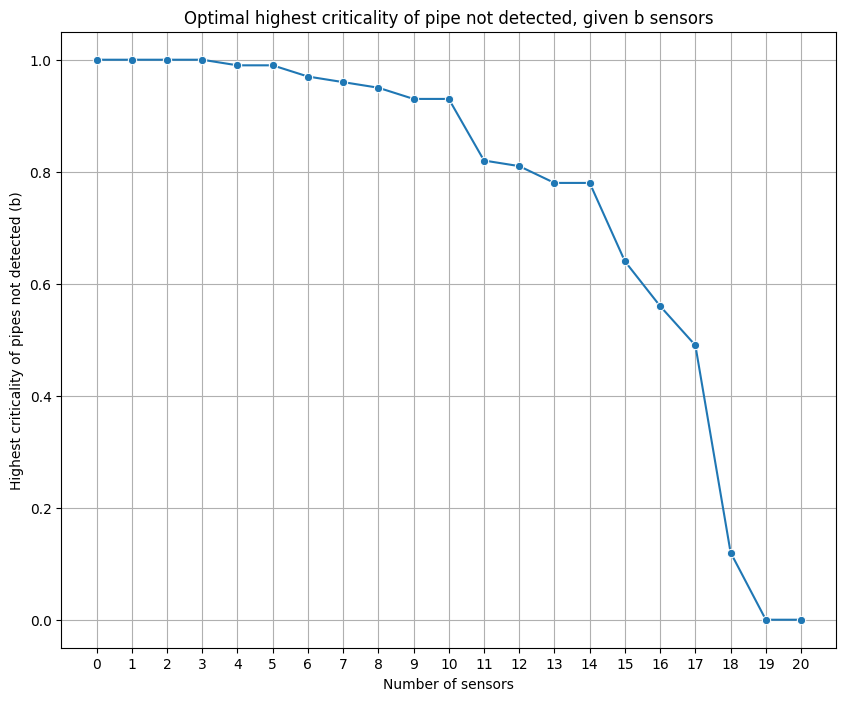

In [102]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.set_figheight(8)
ax.set_xticks([i for i in range(21)])
# ax.set_yticks(np.arange(0,130,5))
sns.lineplot(x=b_values,y=optimal_critical_values,marker='o',ax=ax,legend=True)
ax.set_title("Optimal highest criticality of pipe not detected, given b sensors")
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Highest criticality of pipes not detected (b)")
plt.grid()

#### We see that increasing number of sensors, does not really decrease the highest criticality undetected until about 15 sensors. 

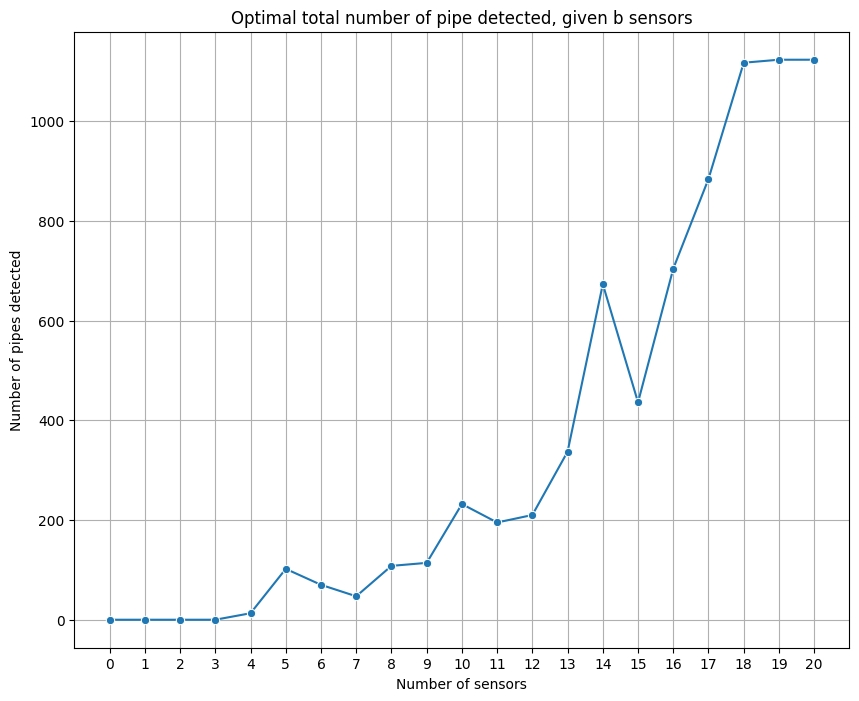

In [103]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.set_figheight(8)
ax.set_xticks([i for i in range(21)])
# ax.set_yticks(np.arange(0,130,5))
sns.lineplot(x=b_values,y=optimal_total_pipes_detected,marker='o',ax=ax,legend=True)
ax.set_title("Optimal total number of pipe detected, given b sensors")
ax.set_xlabel("Number of sensors")
ax.set_ylabel("Number of pipes detected")
plt.grid()

In [101]:
optimal_total_pipes_detected[15]

436.0

#### However, we should also keep in mind the total number of pipes bursts being detected, as for 15 sensors, we cam only detect 436 pipes. So even though, say we can cover critical pipes, we might miss out on detecting multiple failures of low critical pipes.
